REFER THE QUESTION ON CANVAS FOR LAB 2

In [14]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
from dataclasses import dataclass

In [1]:
class LogisticRegression:
    def __init__(self, learning_rate, tolerance, max_iteration, remove_index=[]):

        self.tolerance = tolerance # tolerance value which is called as the convergence criterion
        self.learning_rate = learning_rate # The learning rate for gradient descent
        self.max_iteration = max_iteration # The maximum number of iterations for gradient descent
        self.remove_index_list = remove_index # Indices to remove from the dataset.

    def read_dataset(self):  ## read the dataset from an Excel file and prepare training and testing sets.
        """
        Read the dataset from an Excel file and prepare training and testing sets.
        """
        train_df = pd.read_excel('Lab3_data.xls', sheet_name='2004--2005 Data')
        test_df = pd.read_excel('Lab3_data.xls', sheet_name='2004--2007 Data')

        train_df = self.remove_index(train_df)

        train_df = np.array(train_df, dtype=np.float64)
        test_df = np.array(test_df, dtype=np.float64)

        X_train, y_train = train_df[:, 1:], train_df[:, 0]
        X_test, y_test = test_df[:, 1:], test_df[:, 0]

        return X_train, X_test, y_train, y_test

    def remove_index(self, train_df): # removes indices from the training dataset which will be used to fit the model

        if len(self.remove_index_list) > 0:
            index = np.array(self.remove_index_list) - 1
            train_df = train_df.drop(index)
        return train_df

    def sigmoid(self, z): # sigmoid activation function

        return 1 / (1 + np.exp(-z))

    def cost_function(self, X, y): # this computes the logistic reg cost function with X input features and Y target labels, which further returns computed cost

        sig = self.sigmoid(X.dot(self.w))
        cost = -((y * np.log(sig) + (1 - y) * np.log(1 - sig)).sum()) / X.shape[0]
        return cost

    def gradient(self, X, y): # computes gradient for gradient descent

        sig = self.sigmoid(X.dot(self.w))
        gradient = (sig - y).dot(X)
        return gradient

    def gradient_descent(self, X, y): # performs logistic regression function which determines cost function with maximum iteration

        errors = []
        last_error = float('inf')
        for i in tqdm(range(self.max_iteration)):
            self.w = self.w - self.learning_rate * self.gradient(X, y)
            current_error = self.cost_function(X, y)
            diff = last_error - current_error
            last_error = current_error
            errors.append(current_error)

            if np.abs(diff) < self.tolerance:
                print('Model stopped learning')
                break

    def predict(self, X): # make predictions using the trained model with X as input features and returns predicted labels

        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)

    def evaluate(self, y, y_hat): # evaluates model evaluation to determine F1 score, recall and precision

        y = (y == 1)
        y_hat = (y_hat == 1)
        recall = (y & y_hat).sum() / y.sum()
        precision = (y & y_hat).sum() / y_hat.sum()
        f_score = 2 * (precision * recall) / (precision + recall)
        return f_score, recall, precision

    def fit(self): # Train the logistic regression model and display evaluation metrics and visualizations

        X_train, X_test, y_train, y_test = self.read_dataset()
        print('Solving using Gradient Descent')
        self.w = np.ones(X_train.shape[1], dtype=np.float64) * 0
        self.gradient_descent(X_train, y_train)
        print('Trained Weights:', self.w)
        y_train_hat = self.predict(X_train)
        f_score, recall, precision = self.evaluate(y_train, y_train_hat)
        print('Training F1 score:', f_score)
        print('Training Recall score:', recall)
        print('Training Precision score:', precision)
        self.plot(X_train, y_train)
        self.scatterPlt(X_train, y_train)
        self.plot3D(X_train, y_train)

    def plot(self, X_train, y_train): # Create a 3D plot for the logistic regression decision boundary where X_train determines the training features and Y_train takes in the true labels

        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        ax.scatter3D(X_train[:, 0], X_train[:, 1],
                     self.sigmoid(X_train.dot(self.w)),
                     c=y_train[:], cmap='viridis', s=100)

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15)
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation=0)

    def scatterPlt(self, X_train, y_train): # creates a scatter plot with the logistic regression decision boundary

        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14, 12))

        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)

        ax.scatter(X_train[:, 0], X_train[:, 1],
                   c=y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')

    def plot3D(self, X_train, y_train): # create a 3D plot with the logistic regression decision boundary

        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))

        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14, 12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(X_train[:, 0], X_train[:, 1],
                     c=y_train[:], s=50,
                     cmap="RdBu", vmin=-.2, vmax=1.2,
                     edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

class LogisticRegression:
    def __init__(self, learning_rate, tolerance, max_iteration, remove_index=[]):
        """
        Initialize the Logistic Regression model with hyperparameters.

        Parameters:
        - learning_rate: The learning rate for gradient descent.
        - tolerance: Convergence criterion.
        - max_iteration: Maximum number of iterations for gradient descent.
        - remove_index: Indices to remove from the dataset during training.
        """
        self.tolerance = tolerance
        self.learning_rate = learning_rate
        self.max_iteration = max_iteration
        self.remove_index_list = remove_index

    def read_dataset(self):
        """
        Read the dataset from an Excel file and prepare training and testing sets.
        """
        # Load data from an Excel file, assuming it contains separate sheets for training and testing data
        train_df = pd.read_excel('Lab3_data.xls', sheet_name='2004--2005 Data')
        test_df = pd.read_excel('Lab3_data.xls', sheet_name='2004--2007 Data')

        # Remove specified indices from the training dataset
        train_df = self.remove_index(train_df)

        # Convert data to NumPy arrays for efficient computation
        train_df = np.array(train_df, dtype=np.float64)
        test_df = np.array(test_df, dtype=np.float64)

        # Separate features and labels for training and testing sets
        X_train, y_train = train_df[:, 1:], train_df[:, 0]
        X_test, y_test = test_df[:, 1:], test_df[:, 0]

        return X_train, X_test, y_train, y_test

    def remove_index(self, train_df):
        """
        Remove indices from the training dataset.

        Parameters:
        - train_df: Training dataset.

        Returns:
        - Updated training dataset.
        """
        # Check if there are indices to be removed
        if len(self.remove_index_list) > 0:
            # Convert indices to NumPy array and subtract 1 to align with Python indexing
            index = np.array(self.remove_index_list) - 1
            # Drop rows corresponding to the specified indices
            train_df = train_df.drop(index)
        return train_df

    def sigmoid(self, z):
        """
        Sigmoid activation function.

        Parameters:
        - z: Input value.

        Returns:
        - Sigmoid of z.
        """
        return 1 / (1 + np.exp(-z))

    def cost_function(self, X, y):
        """
        Compute the logistic regression cost function.

        Parameters:
        - X: Input features.
        - y: Target labels.

        Returns:
        - Computed cost.
        """
        # Compute the sigmoid of the linear combination of features and weights
        sig = self.sigmoid(X.dot(self.w))
        # Compute the logistic regression cost using the cross-entropy loss
        cost = -((y * np.log(sig) + (1 - y) * np.log(1 - sig)).sum()) / X.shape[0]
        return cost

    def gradient(self, X, y):
        """
        Compute the gradient for gradient descent.

        Parameters:
        - X: Input features.
        - y: Target labels.

        Returns:
        - Computed gradient.
        """
        # Compute the sigmoid of the linear combination of features and weights
        sig = self.sigmoid(X.dot(self.w))
        # Compute the gradient of the cost with respect to the weights
        gradient = (sig - y).dot(X)
        return gradient

    def gradient_descent(self, X, y):
        """
        Perform logistic regression using gradient descent.

        Parameters:
        - X: Input features.
        - y: Target labels.
        """
        # Initialize an empty list to store errors at each iteration
        errors = []
        # Set the initial error to positive infinity
        last_error = float('inf')

        # Iterate over the specified maximum number of iterations
        for i in tqdm(range(self.max_iteration)):
            # Update weights using gradient descent
            self.w = self.w - self.learning_rate * self.gradient(X, y)
            # Compute the current error
            current_error = self.cost_function(X, y)
            # Compute the difference between the current and last errors
            diff = last_error - current_error
            # Update last_error to the current error
            last_error = current_error
            # Append the current error to the list of errors
            errors.append(current_error)

            # Check for convergence using the specified tolerance
            if np.abs(diff) < self.tolerance:
                print('Model stopped learning')
                break

    def predict(self, X):
        """
        Make predictions using the trained model.

        Parameters:
        - X: Input features.

        Returns:
        - Predicted labels.
        """
        # Compute the sigmoid of the linear combination of features and weights
        sig = self.sigmoid(X.dot(self.w))
        # Round the sigmoid values to obtain binary predictions
        return np.around(sig)

    def evaluate(self, y, y_hat):
        """
        Evaluate model performance.

        Parameters:
        - y: True labels.
        - y_hat: Predicted labels.

        Returns:
        - F1 score, recall, precision.
        """
        # Convert labels to binary format
        y = (y == 1)
        y_hat = (y_hat == 1)
        # Compute recall, precision, and F1 score
        recall = (y & y_hat).sum() / y.sum()
        precision = (y & y_hat).sum() / y_hat.sum()
        f_score = 2 * (precision * recall) / (precision + recall)
        return f_score, recall, precision

    def fit(self):
        """
        Train the logistic regression model and display evaluation metrics and visualizations.
        """
        # Read and preprocess the dataset
        X_train, X_test, y_train, y_test = self.read_dataset()
        print('Solving using Gradient Descent')

        # Initialize weights with zeros
        self.w = np.ones(X_train.shape[1], dtype=np.float64) * 0
        # Train the model using gradient descent
        self.gradient_descent(X_train, y_train)
        print('Trained Weights:', self.w)

        # Make predictions on the training set
        y_train_hat = self.predict(X_train)
        # Evaluate model performance on the training set
        f_score, recall, precision = self.evaluate(y_train, y_train_hat)
        print('Training F1 score:', f_score)
        print('Training Recall score:', recall)
        print('Training Precision score:', precision)

        # Visualize the decision boundary in 3D
        self.plot(X_train, y_train)

        # Visualize the decision boundary in 2D
        self.scatterPlt(X_train, y_train)

        # Visualize the decision boundary in a 3D contour plot
        self.plot3D(X_train, y_train)

    def plot(self, X_train, y_train):
        """
        Create a 3D plot for the logistic regression decision boundary.

        Parameters:
        - X_train: Training features.
        - y_train: True labels.
        """
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Scatter plot of training data points colored by true labels
        ax.scatter3D(X_train[:, 0], X_train[:, 1],
                     self.sigmoid(X_train.dot(self.w)),
                     c=y_train[:], cmap='viridis', s=100)

        # Set axis limits and labels
        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15)
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation=0)
        plt.show()

    def scatterPlt(self, X_train, y_train):
        """
        Create a scatter plot with the logistic regression decision boundary.

        Parameters:
        - X_train: Training features.
        - y_train: True labels.
        """
        # Define the range for the plot
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        # Create a meshgrid for the decision boundary
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        # Create a contour plot of the decision boundary
        f, ax = plt.subplots(figsize=(14, 12))
        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)

        # Scatter plot of training data points colored by true labels
        ax.scatter(X_train[:, 0], X_train[:, 1],
                   c=y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        # Set axis labels
        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        plt.show()

    def plot3D(self, X_train, y_train):
        """
        Create a 3D plot with the logistic regression decision boundary.

        Parameters:
        - X_train: Training features.
        - y_train: True labels.
        """
        # Define the range for the plot
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        # Create a meshgrid for the decision boundary
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))

        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14, 12))
        ax = plt.axes(projection='3d')

        # Create a 3D contour plot of the decision boundary
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        # Scatter plot of training data points colored by true labels
        ax.scatter3D(X_train[:, 0], X_train[:, 1],
                     c=y_train[:], s=50,
                     cmap="RdBu", vmin=-.2, vmax=1.2,
                     edgecolor="white", linewidth=1)

        # Set axis labels and title
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()


Solving using Gradient Descent


  0%|          | 0/50000 [00:00<?, ?it/s]<ipython-input-11-23a1d867feef>:87: RuntimeWarning: divide by zero encountered in log
  cost = -((y * np.log(sig) + (1 - y) * np.log(1 - sig)).sum()) / X.shape[0]
<ipython-input-11-23a1d867feef>:87: RuntimeWarning: invalid value encountered in multiply
  cost = -((y * np.log(sig) + (1 - y) * np.log(1 - sig)).sum()) / X.shape[0]
100%|██████████| 50000/50000 [00:01<00:00, 27801.11it/s]


Trained Weights: [-1.16839575  0.52313082]
Training F1 score: 0.9253731343283582
Training Recall score: 0.8611111111111112
Training Precision score: 1.0


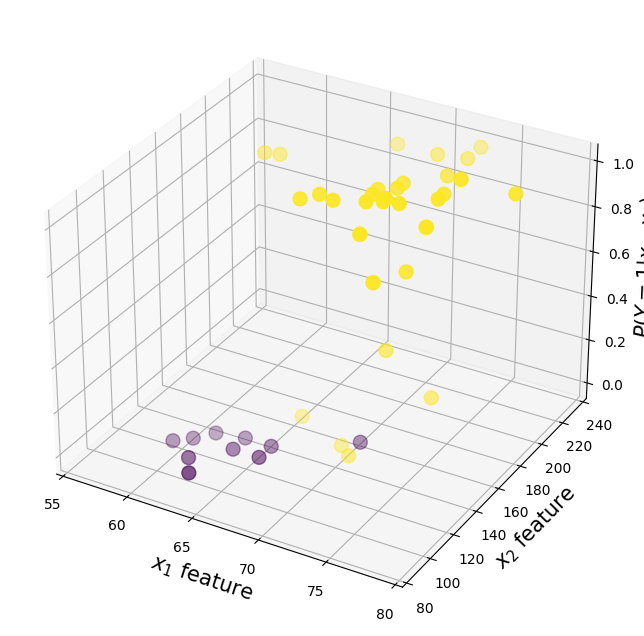

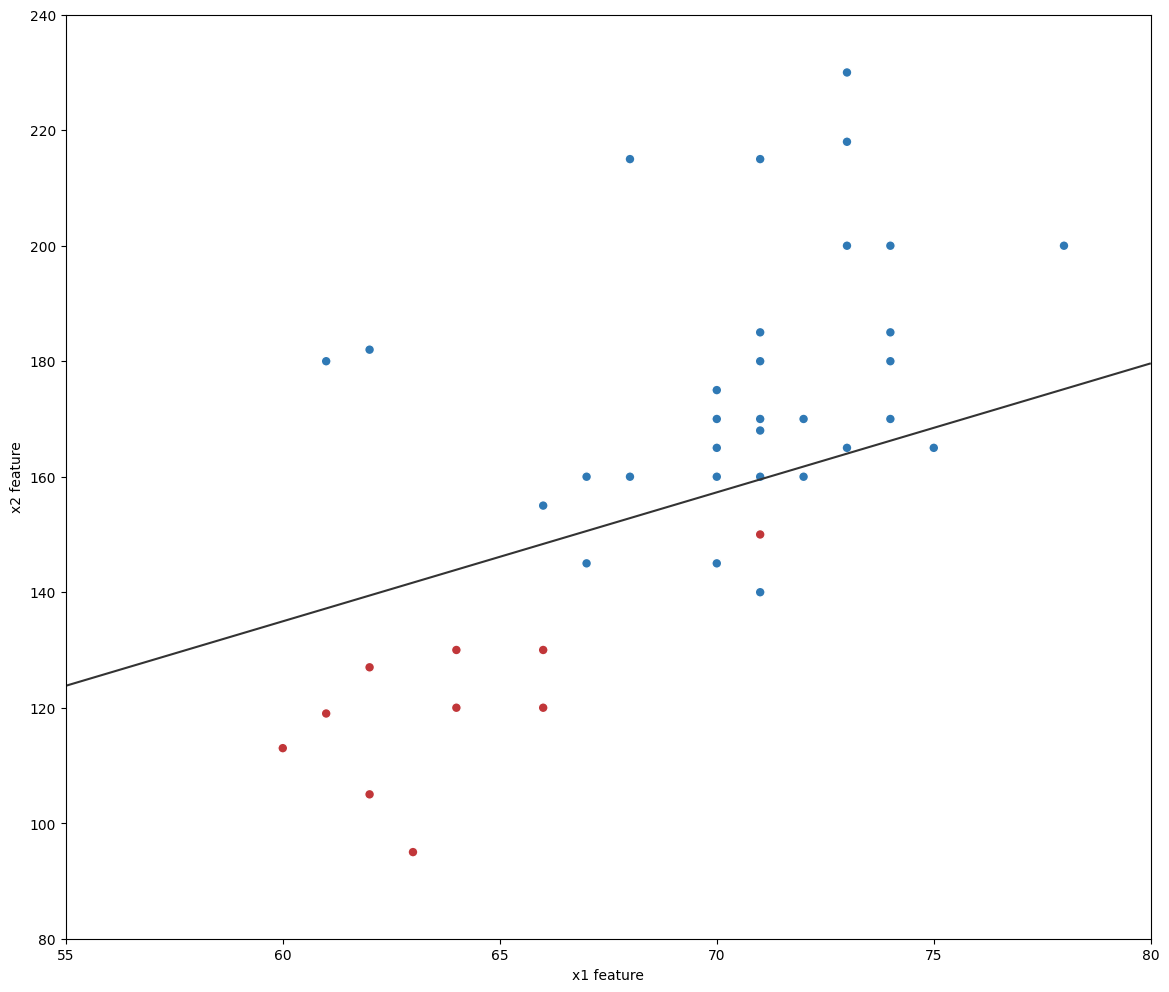

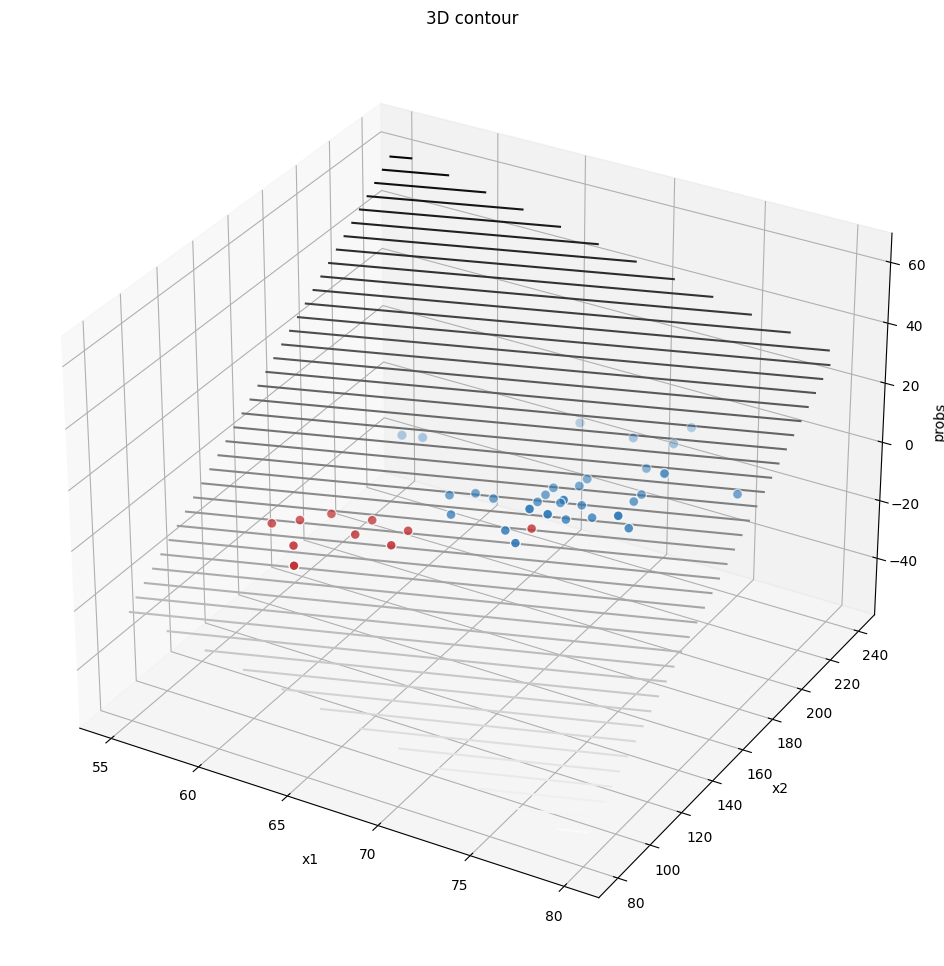

In [12]:
# Create an instance of the LogisticRegression class with specified hyperparameters
custom_logreg_model = LogisticRegression(learning_rate=0.0001, tolerance=0.00005, max_iteration=50000)

# Fit the logistic regression model using the provided dataset and hyperparameters
custom_logreg_model.fit()

# At this point, the model is trained, and evaluation metrics and visualizations have been displayed.


Solving using Gradient Descent


  0%|          | 0/50000 [00:00<?, ?it/s]<ipython-input-8-8eab7e6e89e2>:79: RuntimeWarning: divide by zero encountered in log
  cost = -((y * np.log(sig) + (1 - y) * np.log(1 - sig)).sum()) / X.shape[0]
<ipython-input-8-8eab7e6e89e2>:79: RuntimeWarning: invalid value encountered in multiply
  cost = -((y * np.log(sig) + (1 - y) * np.log(1 - sig)).sum()) / X.shape[0]
100%|██████████| 50000/50000 [00:02<00:00, 19102.97it/s]


Trained Weights: [-1.16839575  0.52313082]
Training F1 score: 0.9253731343283582
Training Recall score: 0.8611111111111112
Training Precision score: 1.0


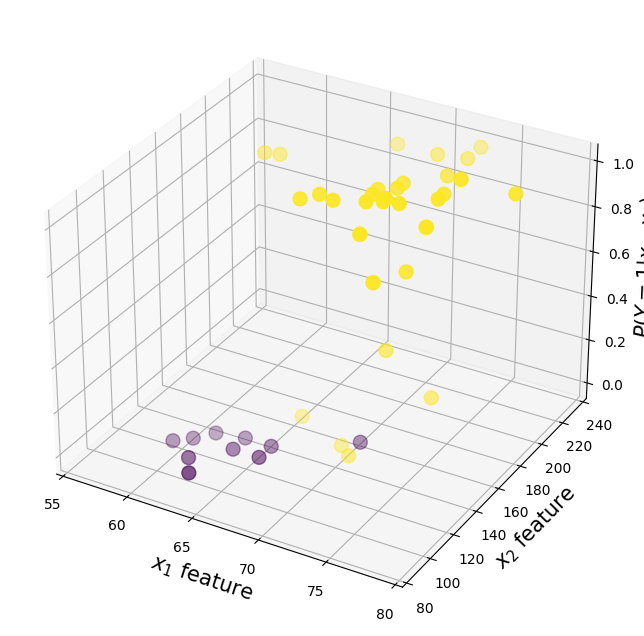

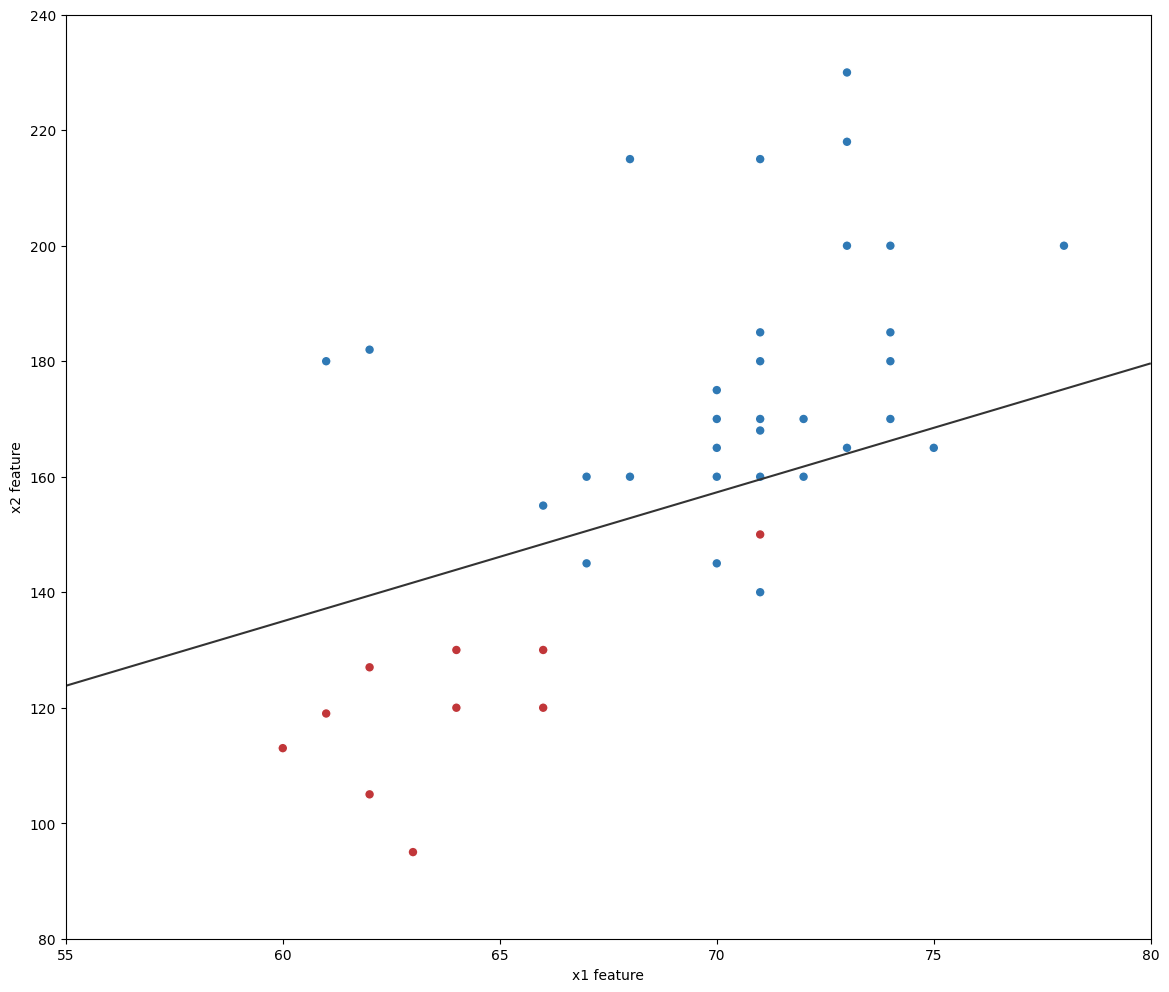

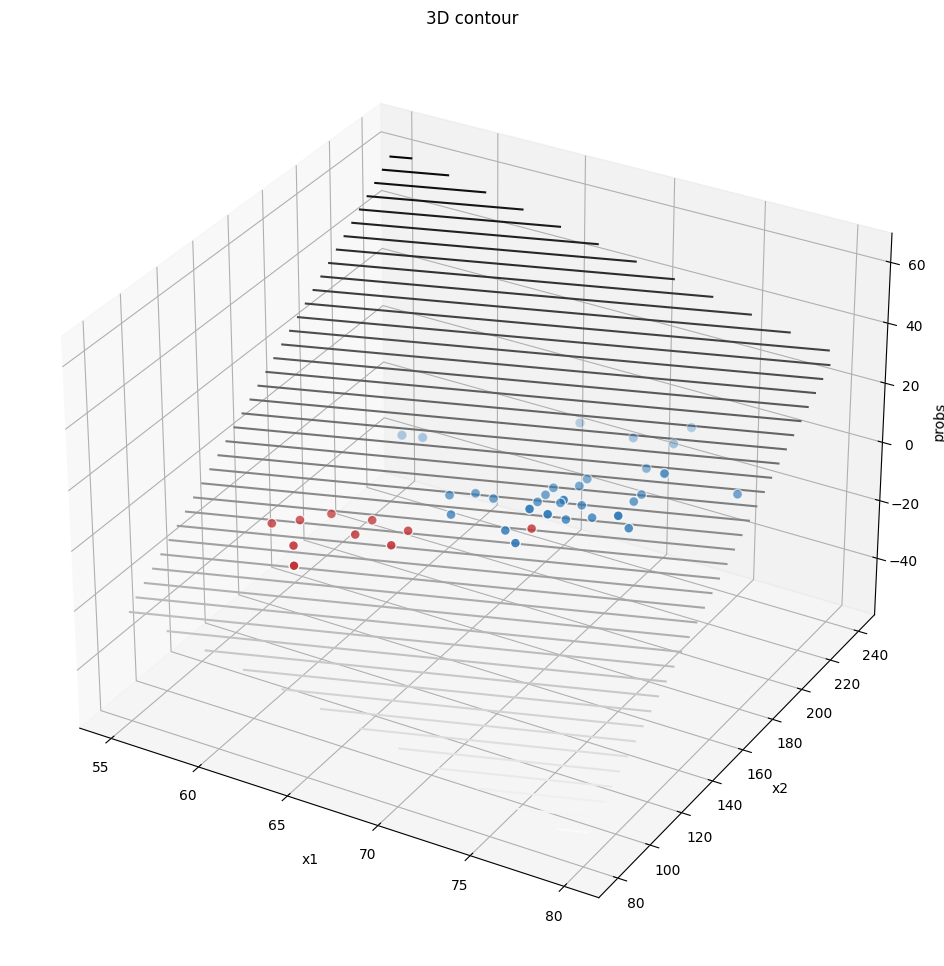

In [10]:
lr_model.fit() ## fit the logistic regression model

Solving using Gradient Descent


  0%|          | 0/50000 [00:00<?, ?it/s]<ipython-input-11-23a1d867feef>:87: RuntimeWarning: divide by zero encountered in log
  cost = -((y * np.log(sig) + (1 - y) * np.log(1 - sig)).sum()) / X.shape[0]
<ipython-input-11-23a1d867feef>:87: RuntimeWarning: invalid value encountered in multiply
  cost = -((y * np.log(sig) + (1 - y) * np.log(1 - sig)).sum()) / X.shape[0]
  0%|          | 185/50000 [00:00<00:02, 20044.08it/s]

Model stopped learning
Trained Weights: [-0.85994008  0.41784681]
Training F1 score: 1.0
Training Recall score: 1.0
Training Precision score: 1.0


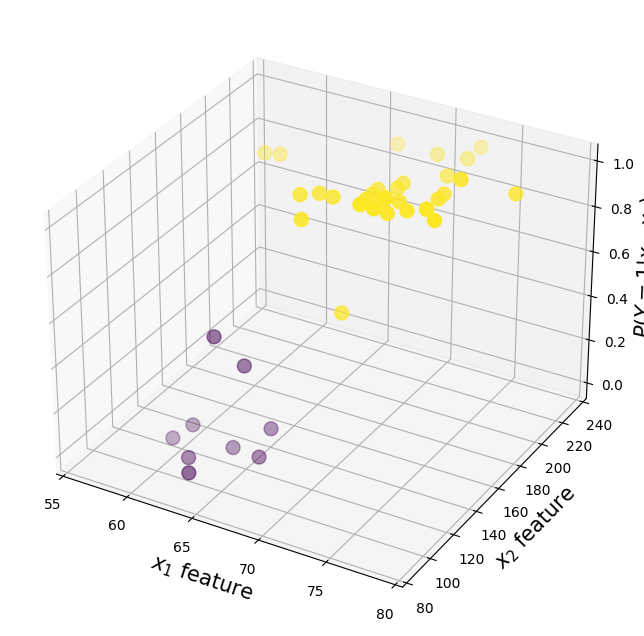

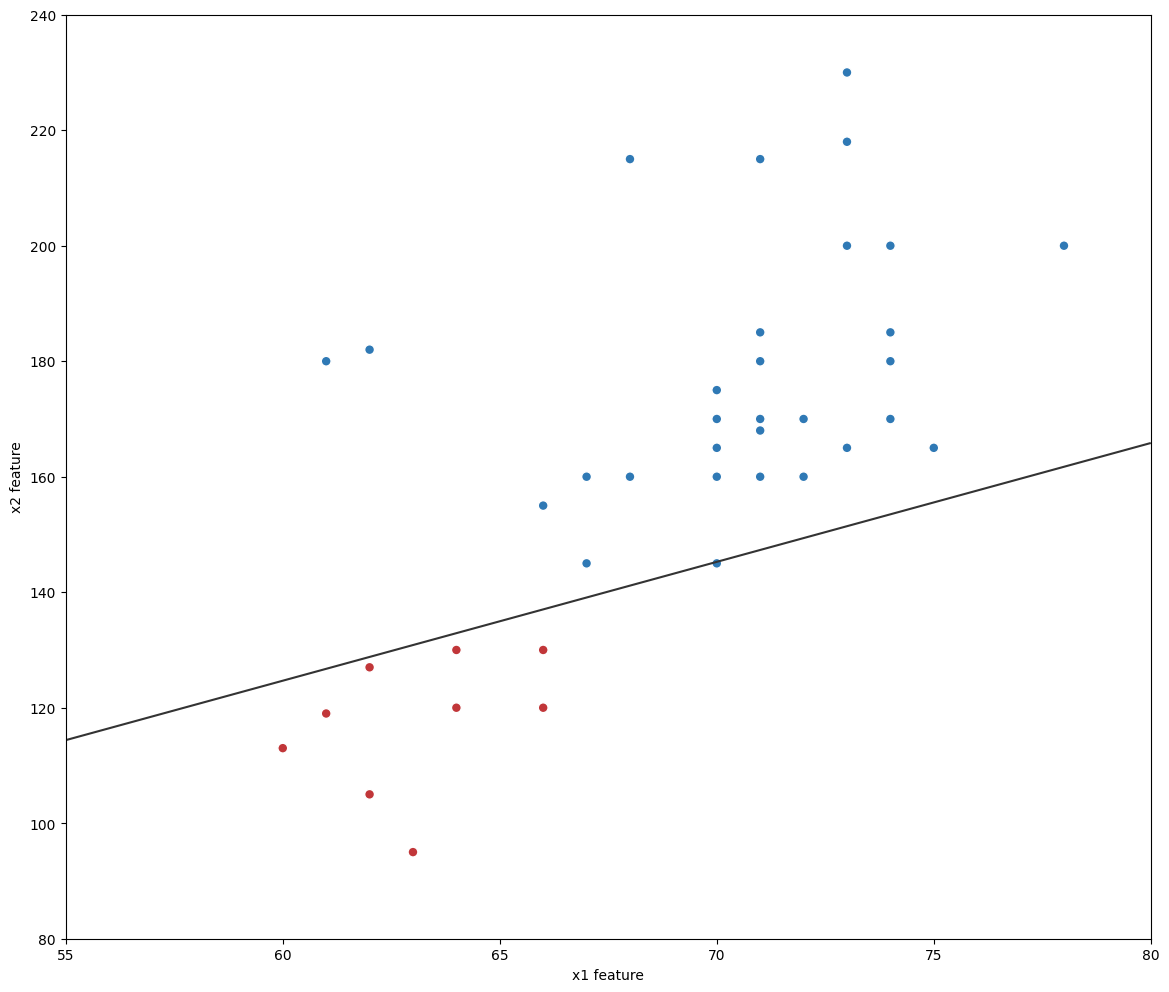

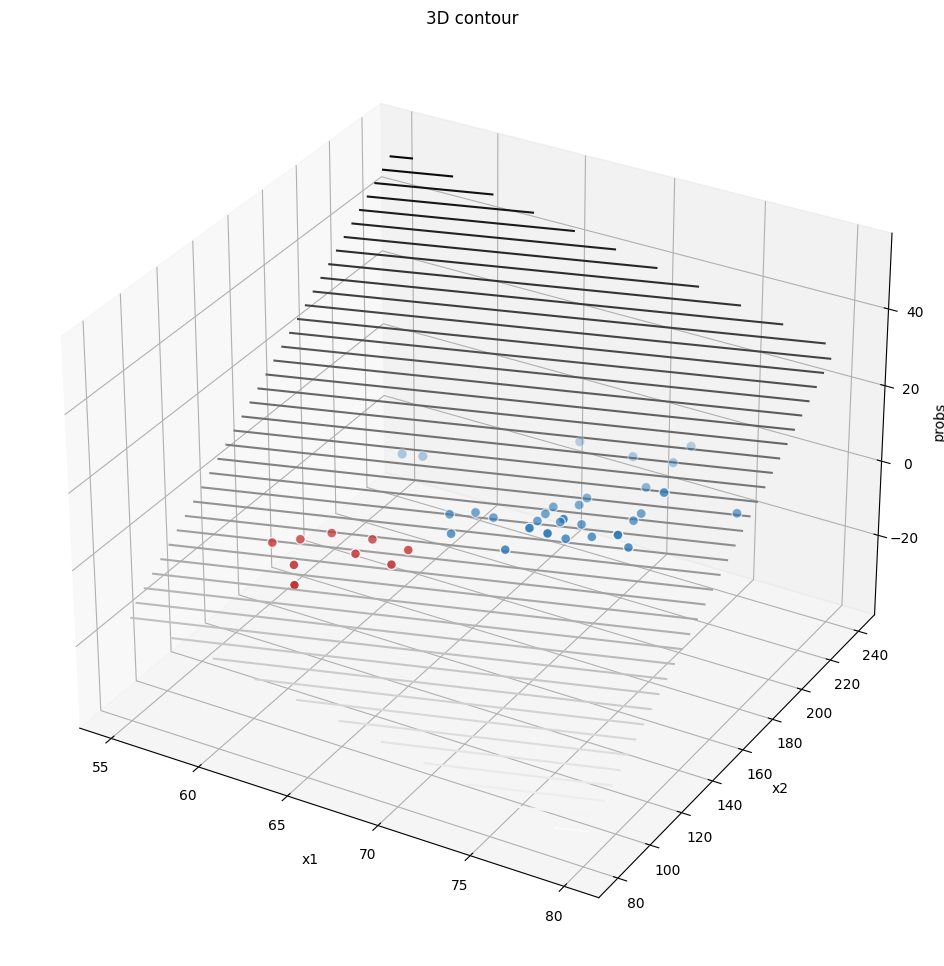

In [13]:
# Create an instance of the LogisticRegression class with specified hyperparameters
# and remove indices 1 and 39 from the training dataset
custom_logreg_model_ri = LogisticRegression(
    learning_rate=0.0001, tolerance=0.00005, max_iteration=50000, remove_index=[1, 39]
)

# Fit the logistic regression model with index removal using the provided dataset and hyperparameters
custom_logreg_model_ri.fit()

# At this point, the model is trained with the specified index removal,
# and evaluation metrics along with visualizations have been displayed.


Explain why removing data point number 1 and 39 has a large effect on the predicted probability of the model.

Data points 1 and 39 have been identified as outliers within their respective classes. The decision to remove these specific data points is grounded in their outlier status and is driven by several key considerations.

**1. Outlier Impact on Logistic Regression Efficiency:**
   The presence of outliers can significantly impact the efficiency of a logistic regression model. Outliers, by their nature, can disproportionately influence the training process. Their removal is aimed at enhancing the model's overall predictive performance by mitigating the distortion introduced by these atypical observations.

**2. Weight Sensitivity and Model Dynamics:**
   Each data point in logistic regression contributes to the computation of weights during model training. Data points 1 and 39, being outliers, may exert substantial influence, leading to skewed weight distributions. By removing these influential points, we aim to recalibrate the model's sensitivity to different data instances. This adjustment not only affects the decision boundary but also reshapes the model's interpretation of feature importance.

**3. Ripple Effect on Model Behavior:**
   The impact of removing data points 1 and 39 extends beyond their immediate removal. It has a ripple effect on the entire model, influencing how the logistic regression model assigns importance to various features. This, in turn, affects the predicted probabilities and the overall optimization landscape during the training process.

**Conclusion:**
   The decision to exclude data points 1 and 39 is multi-faceted, encompassing aspects such as decision boundary adjustment, class balance, weight distribution, and optimization landscape modification. These considerations underscore the significance of meticulous data preprocessing and a nuanced understanding of the role individual data points play in shaping the behavior of the logistic regression model.
